# Plot all groups

In [1]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np

from common import LATEST_DUMP_FILENAME, label_groups

from allisbns.dataset import BinnedArray, CodeDataset
from allisbns.isbn import LAST_ISBN
from allisbns.plotting import BlockBinnedPlotter
from allisbns.rearrange import rearrange_to_blocks


%load_ext autoreload
%autoreload 2

## Load data

In [2]:
input_path = LATEST_DUMP_FILENAME
input_path

'aa_isbn13_codes_20251118T170842Z.benc.zst'

In [3]:
md5 = CodeDataset.from_file(input_path, collection="md5", fill_to_isbn=LAST_ISBN)
md5

CodeDataset(array([     6,      1,      9, ...,  91739,      1, 531099],
      shape=(14737376,)), bounds=(978000000000, 979999999999))

## Create group image

### Label groups

In [4]:
binned = md5.bin(2000)
binned

BinnedArray(array([925, 939, 634, ...,   0,   0,   0], shape=(1000000,), dtype=int32), bin_size=2000)

In [5]:
labeled_by_groups = label_groups(binned.bins, binned.bin_size)
labeled_by_groups

array([1., 1., 1., ..., 0., 0., 0.], shape=(1000000,), dtype=float32)

In [6]:
labeled_group_image = rearrange_to_blocks(labeled_by_groups, bin_size=binned.bin_size)
labeled_group_image

array([[1., 1., 1., ..., 0., 0., 0.],
       [1., 1., 1., ..., 0., 0., 0.],
       [1., 1., 1., ..., 0., 0., 0.],
       ...,
       [1., 1., 1., ..., 0., 0., 0.],
       [1., 1., 1., ..., 0., 0., 0.],
       [1., 1., 1., ..., 0., 0., 0.]], shape=(500, 2000), dtype=float32)

In [7]:
group_count = np.max(labeled_group_image)
group_count

np.float32(283.0)

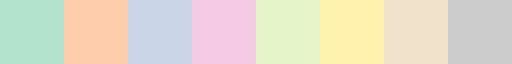

In [8]:
mpl.colormaps.get_cmap("Pastel2")

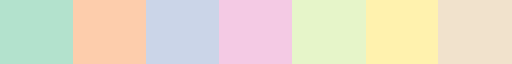

In [9]:
group_colormap = mpl.colors.ListedColormap(
    # Skip the last gray color
    [*mpl.colormaps.get_cmap("Pastel2").colors[:-1]]
)
group_colormap

In [10]:
# Rescale group labels to colormap colors in a cycle
rescaled_group_image = labeled_group_image.copy()
non_zero = rescaled_group_image != 0
rescaled_group_image[non_zero] = (
    rescaled_group_image[non_zero] - 1
) % group_colormap.N + 1
rescaled_group_image.max()

np.float32(7.0)

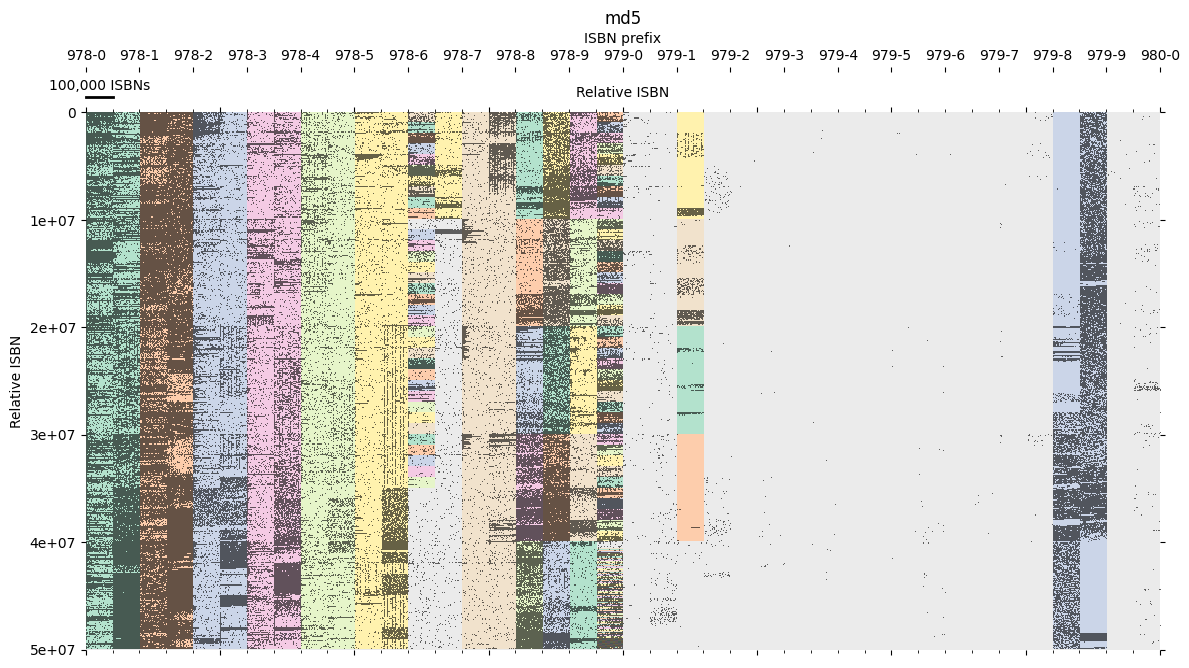

In [11]:
fig, ax = plt.subplots(1, 1, figsize=(12, 12))

plotter = BlockBinnedPlotter(ax, bin_size=binned.bin_size, aspect=2)

plotter.plot_image(
    rescaled_group_image,
    colormap=group_colormap,
    vmin=0.5,
    vmax=group_colormap.N + 0.5,
    show_colorbar=False,
)
plotter.plot_bins(
    # Plot bins in a binary mode
    BinnedArray(np.bool(binned), binned.bin_size),
    colormap=mpl.colormaps["binary"],
    show_colorbar=False,
    vmin=0,
    vmax=1,
    alpha=0.6,
)

ax.set_facecolor("0.92")

plt.title("md5")

plt.tight_layout()
plt.show()

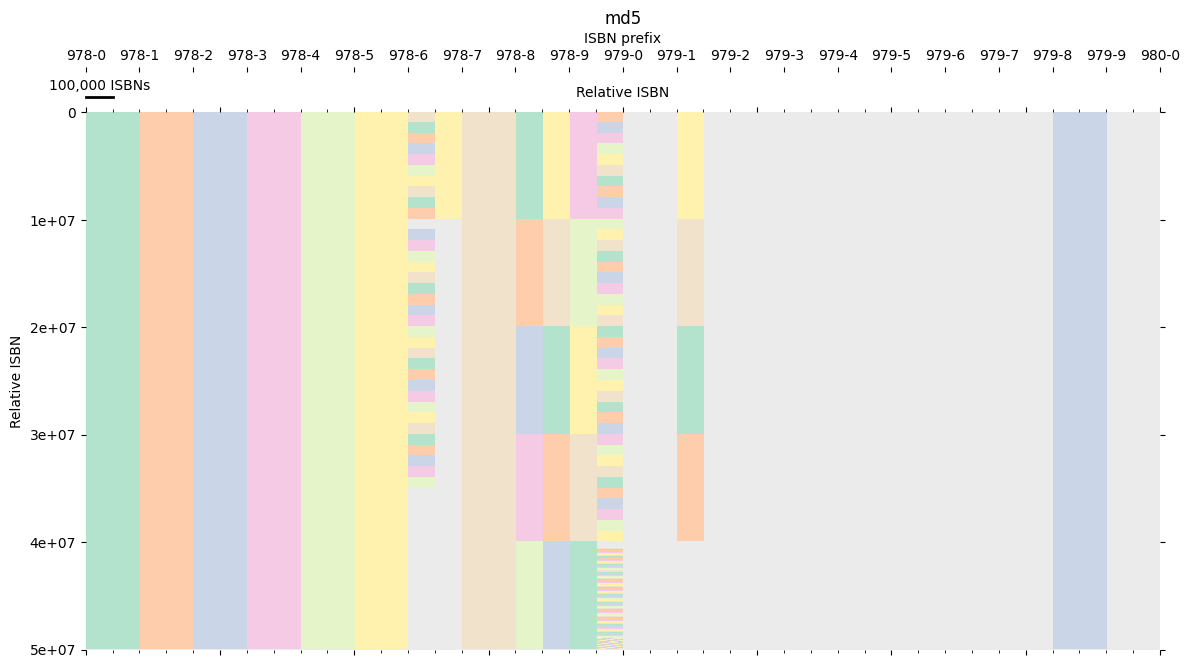

In [12]:
# Show just the colored group image
fig.gca().get_images()[1].remove()
fig